# DATA CLEANING 2016

### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import csv

### Loading the Csvs and combining into a single dataframe

In [2]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'
df = pd.read_csv(open(cur_path+'/Data2016_Uncleaned.csv','rU'), encoding='utf-8')
df.shape

### CLEANING

### Getting rid of columns having 98% or more missing data

In [216]:
missing_data = df.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/df.shape[0])*100
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent<99.38)]
len(features)

62

In [217]:
# Considering only the columns having more than 99.38% of data
d = df[features]

# Renaming the columns
d = d.rename(columns = {'DayofMonth':'Day','DayOfWeek':'Week'})

### Taking only the columns relevant for the delay

In [218]:
columns = ['FlightNum','Year','Day','Month','Week','Origin','Dest','UniqueCarrier','Cancelled','ArrTime','DepTime','CRSArrTime','CRSDepTime','DepDel15','ArrDel15','CRSElapsedTime','ActualElapsedTime','ArrDelayMinutes','DepDelayMinutes','OriginCityName','DestCityName']

In [219]:
len(columns)

21

In [220]:
dt = d[columns]
dt.shape

(5617658, 21)

In [221]:
len(dt[dt.Cancelled==1])

65861

In [222]:
dt = dt[dt.Cancelled==0]

In [223]:
dt.isnull().sum().sort_values()

FlightNum                0
DepDelayMinutes          0
CRSElapsedTime           0
DepDel15                 0
CRSDepTime               0
CRSArrTime               0
OriginCityName           0
Cancelled                0
DepTime                  0
Dest                     0
Origin                   0
Week                     0
Month                    0
Day                      0
Year                     0
UniqueCarrier            0
DestCityName             0
ArrTime               1983
ArrDel15             13652
ActualElapsedTime    13652
ArrDelayMinutes      13652
dtype: int64

### Removing row having 'ArrTime','ArrDelayMinutes','ActualElapsedTime','ArrDelayMinutes' Nulls

In [224]:
dt = dt[(dt.ArrTime.notnull()) & (dt.ActualElapsedTime.notnull())]

In [225]:
dt.isnull().sum().sort_values()

FlightNum            0
DepDelayMinutes      0
ArrDelayMinutes      0
ActualElapsedTime    0
CRSElapsedTime       0
ArrDel15             0
DepDel15             0
CRSDepTime           0
CRSArrTime           0
OriginCityName       0
DepTime              0
Cancelled            0
UniqueCarrier        0
Dest                 0
Origin               0
Week                 0
Month                0
Day                  0
Year                 0
ArrTime              0
DestCityName         0
dtype: int64

In [226]:
dt.dtypes

FlightNum              int64
Year                   int64
Day                    int64
Month                  int64
Week                   int64
Origin                object
Dest                  object
UniqueCarrier         object
Cancelled            float64
ArrTime              float64
DepTime              float64
CRSArrTime             int64
CRSDepTime             int64
DepDel15             float64
ArrDel15             float64
CRSElapsedTime       float64
ActualElapsedTime    float64
ArrDelayMinutes      float64
DepDelayMinutes      float64
OriginCityName        object
DestCityName          object
dtype: object

In [227]:
dt[['Cancelled','ArrTime','DepTime','DepDel15','ArrDel15',
    'CRSElapsedTime','ActualElapsedTime','ArrDelayMinutes','DepDelayMinutes']]=dt[['Cancelled',
                                                                                   'ArrTime','DepTime','DepDel15','ArrDel15','CRSElapsedTime','ActualElapsedTime','ArrDelayMinutes','DepDelayMinutes']].astype(int)

### Mapping from the LOOKUP tables

In [228]:
# # Mappping Day number to name
# days = {1:'Monday',2:'Tuesday',3:'Wedsday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}

# df['Day'] = df['DayOfWeek'].apply(lambda x: days[x])

In [229]:
cancel = pd.read_csv(cur_path+'/Lookup/CancellationCode.csv', low_memory=False)
airport = pd.read_csv(cur_path+'/Lookup/AirportID.csv', low_memory=False)
carrier = pd.read_csv(cur_path+'/Lookup/UniqueCarrier.csv', low_memory=False)
origin = pd.read_csv(cur_path+'/Lookup/Origin.csv', low_memory=False)

cancel_dict = cancel.set_index('Code').T.to_dict('list')
origin_dict = origin.set_index('Code').T.to_dict('list')
airport_dict = airport.set_index('Code').T.to_dict('list')
carrier_dict = carrier.set_index('Code').T.to_dict('list')

In [230]:
#df['day'] = df['DayOfWeek'].apply(lambda x: days[x])

### Adding new columns to differentiate flights felayed and ontime flights

In [231]:
dt['Flight_Status'] = 0
dt.loc[dt.DepDel15==1.0 ,'Flight_Status'] = 1
dt.loc[dt.ArrDel15==1.0,'Flight_Status'] = 1
dt['Flight_Status'] = dt['Flight_Status'].astype(int)

In [232]:
dt.isnull().sum()

FlightNum            0
Year                 0
Day                  0
Month                0
Week                 0
Origin               0
Dest                 0
UniqueCarrier        0
Cancelled            0
ArrTime              0
DepTime              0
CRSArrTime           0
CRSDepTime           0
DepDel15             0
ArrDel15             0
CRSElapsedTime       0
ActualElapsedTime    0
ArrDelayMinutes      0
DepDelayMinutes      0
OriginCityName       0
DestCityName         0
Flight_Status        0
dtype: int64

### Removing Outliers

In [233]:
dt.shape

(5538145, 22)

In [234]:
dt[dt.DepDelayMinutes>1350].shape

(48, 22)

In [235]:
dt[dt.ArrDelayMinutes>1400].shape

(41, 22)

In [236]:
dd =dt

In [237]:
dd = dd[dd.DepDelayMinutes<1350]

In [238]:
dd = dd[dd.ArrDelayMinutes<1400]
dd.shape

(5538095, 22)

In [239]:
dd = dd[~((dd['Month'] == 1) & (dd['ArrDelayMinutes']>1320))]
dd = dd[~((dd['Month'] == 2) & (dd['ArrDelayMinutes']>1220))]
dd = dd[~((dd['Month'] == 3) & (dd['ArrDelayMinutes']>1220))]
dd = dd[~((dd['Month'] == 5) & (dd['ArrDelayMinutes']>1500))]
dd = dd[~((dd['Month'] == 6) & (dd['ArrDelayMinutes']>1200))]
dd = dd[~((dd['Month'] == 7) & (dd['ArrDelayMinutes']>1350))]
dd = dd[~((dd['Month'] == 9) & (dd['ArrDelayMinutes']>1120))]
dd = dd[~((dd['Month'] == 9) & (dd['ArrDelayMinutes']>1020))]
dd = dd[~((dd['Month'] == 10) & (dd['ArrDelayMinutes']>1270))]
dd = dd[~((dd['Month'] == 11) & (dd['ArrDelayMinutes']>1200))]
dd = dd[~((dd['Month'] == 12) & (dd['ArrDelayMinutes']>1350))]

In [240]:
dd.shape

(5538054, 22)

In [241]:
#dd[(dd.Month==11) & (dd.DepDelayMinutes>1100)]

In [242]:
dd = dd[~((dd['Month'] == 2) & (dd['DepDelayMinutes']>1220))]
dd = dd[~((dd['Month'] == 4) & (dd['DepDelayMinutes']>1220))]
dd = dd[~((dd['Month'] == 5) & (dd['DepDelayMinutes']>1200))]
dd = dd[~((dd['Month'] == 10) & (dd['DepDelayMinutes']>1210))]
dd = dd[~((dd['Month'] == 11) & (dd['DepDelayMinutes']>1100))]
dd = dd[~((dd['Month'] == 12) & (dd['DepDelayMinutes']>1350))]

In [243]:
dd.shape

(5538041, 22)

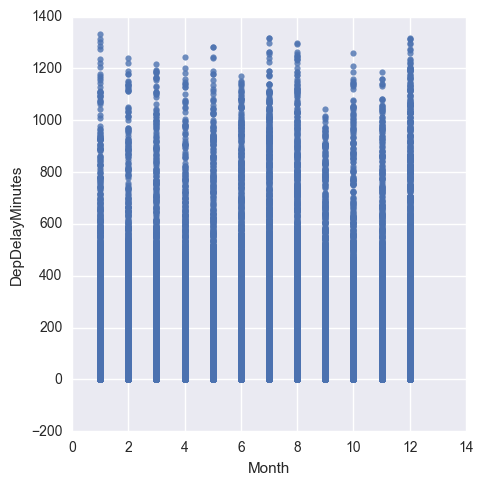

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='DepDelayMinutes', data=dd, fit_reg=False)
plt.show()

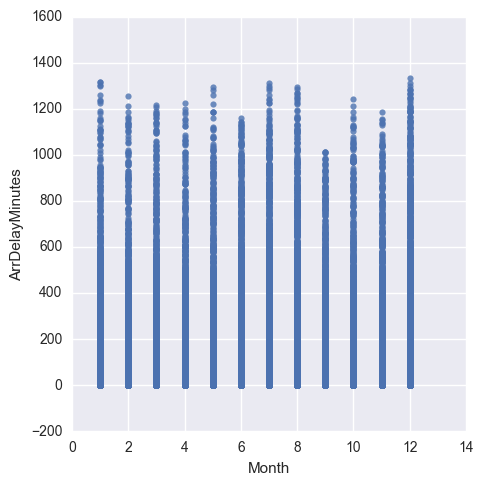

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='ArrDelayMinutes', data=dd, fit_reg=False)
plt.show()

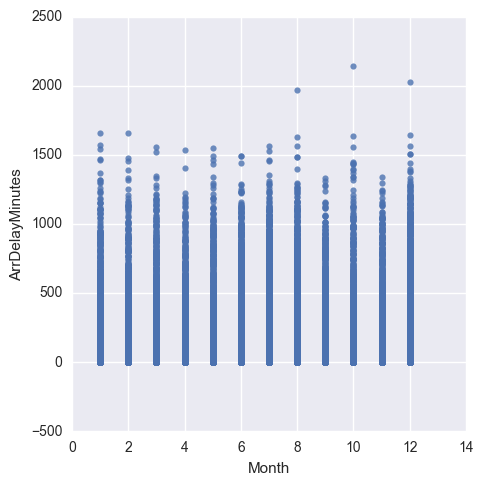

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='ArrDelayMinutes', data=dt, fit_reg=False)
plt.show()

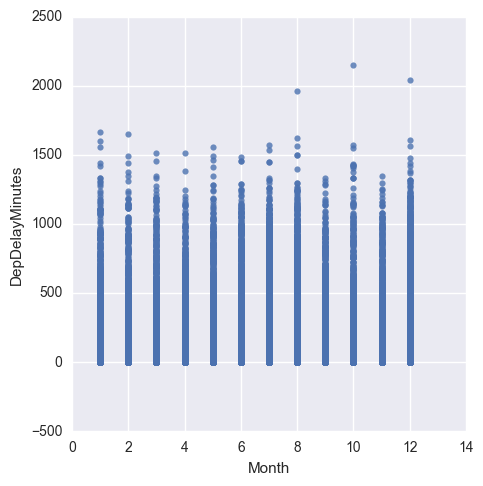

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='DepDelayMinutes', data=dt, fit_reg=False)
plt.show()

In [145]:
#dd.to_csv(cur_path+'/Data2016_Cleaned.csv', index = False)

# DATA CLEANING 2017

In [245]:
df1 = pd.read_csv(open(cur_path+'/Data2017_Uncleaned.csv','rU'), encoding='utf-8')
df1.shape

(4276457, 109)

In [246]:
missing_data1 = df1.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data1['Missing_percent'] = (missing_data1['Missing_Count']/df1.shape[0])*100
missing_data1 = missing_data1.sort_values(by='Missing_percent', axis=0, ascending=True)
features1 = missing_data1['index'][(missing_data1.Missing_percent<99.38)]
len(features1)
d1 = df1[features1]

In [247]:
d1 = d1.rename(columns = {'DayofMonth':'Day','DayOfWeek':'Week'})

In [248]:
dt1= d1[columns]
dt1.shape

(4276457, 21)

In [249]:
dt1 = dt1[dt1.Cancelled==0]
dt1.shape

(4203809, 21)

In [250]:
dt1.isnull().sum()

FlightNum                0
Year                     0
Day                      0
Month                    0
Week                     0
Origin                   0
Dest                     0
UniqueCarrier            0
Cancelled                0
ArrTime               1572
DepTime                  0
CRSArrTime               0
CRSDepTime               0
DepDel15                 0
ArrDel15             10212
CRSElapsedTime           0
ActualElapsedTime    10212
ArrDelayMinutes      10212
DepDelayMinutes          0
OriginCityName           0
DestCityName             0
dtype: int64

In [251]:
dt1 = dt1[(dt.ArrTime.notnull()) & (dt1.ActualElapsedTime.notnull())]
dt1.shape

(4130702, 21)

In [252]:
dt1[['Cancelled','ArrTime','DepTime','DepDel15','ArrDel15',
    'CRSElapsedTime','ActualElapsedTime','ArrDelayMinutes','DepDelayMinutes']]=dt1[['Cancelled',
                                                                                   'ArrTime','DepTime','DepDel15','ArrDel15','CRSElapsedTime','ActualElapsedTime','ArrDelayMinutes','DepDelayMinutes']].astype(int)

In [253]:
dt1['Flight_Status'] = 0
dt1.loc[dt1.DepDel15==1.0 ,'Flight_Status'] = 1
dt1.loc[dt1.ArrDel15==1.0,'Flight_Status'] = 1
dt1['Flight_Status'] = dt1['Flight_Status'].astype(int)

In [254]:
dd1 = dt1
dd1.shape

(4130702, 22)

In [255]:
dd1 = dd1[~((dd1['Month'] == 1) & (dd1['ArrDelayMinutes']>1500))]
dd1 = dd1[~((dd1['Month'] == 3) & (dd1['ArrDelayMinutes']>1500))]
dd1 = dd1[~((dd1['Month'] == 9) & (dd1['ArrDelayMinutes']>1500))]
dd1 = dd1[~((dd1['Month'] == 5) & (dd1['ArrDelayMinutes']>1530))]
dd1 = dd1[~((dd1['Month'] == 6) & (dd1['ArrDelayMinutes']>1500))]
dd1 = dd1[~((dd1['Month'] == 7) & (dd1['ArrDelayMinutes']>1550))]
dd1 = dd1[~((dd1['Month'] == 9) & (dd1['ArrDelayMinutes']>1300))]

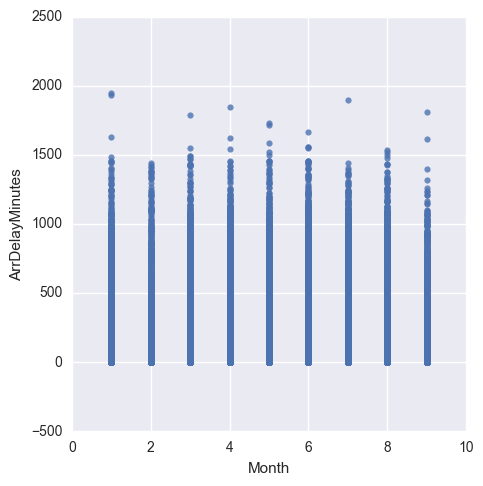

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='ArrDelayMinutes', data=dd1, fit_reg=False)
plt.show()

In [256]:
dd1 = dd1[~((dd1['Month'] == 1) & (dd1['DepDelayMinutes']>1500))]
dd1 = dd1[~((dd1['Month'] == 3) & (dd1['DepDelayMinutes']>1500))]
dd1 = dd1[~((dd1['Month'] == 4) & (dd1['DepDelayMinutes']>1500))]
dd1 = dd1[~((dd1['Month'] == 5) & (dd1['DepDelayMinutes']>1520))]
dd1 = dd1[~((dd1['Month'] == 6) & (dd1['DepDelayMinutes']>1500))]
dd1 = dd1[~((dd1['Month'] == 7) & (dd1['DepDelayMinutes']>1500))]
dd1 = dd1[~((dd1['Month'] == 9) & (dd1['DepDelayMinutes']>1300))]

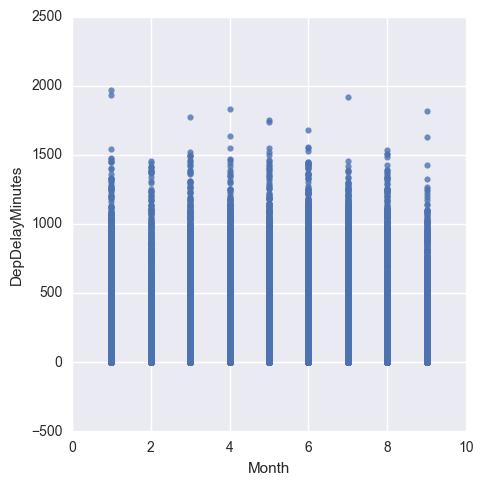

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='DepDelayMinutes', data=dd1, fit_reg=False)
plt.show()

In [213]:
dd1.shape

(4130680, 22)

In [258]:
dd.shape

(5538041, 22)

In [259]:
data = pd.concat([dd,dd1])

In [261]:
data.shape

(9668721, 22)

In [262]:
data.isnull().sum()

FlightNum            0
Year                 0
Day                  0
Month                0
Week                 0
Origin               0
Dest                 0
UniqueCarrier        0
Cancelled            0
ArrTime              0
DepTime              0
CRSArrTime           0
CRSDepTime           0
DepDel15             0
ArrDel15             0
CRSElapsedTime       0
ActualElapsedTime    0
ArrDelayMinutes      0
DepDelayMinutes      0
OriginCityName       0
DestCityName         0
Flight_Status        0
dtype: int64

In [263]:
data.to_csv(cur_path+'/DataClean.csv',index = False)

In [3]:
data = pd.read_csv(open(cur_path+'/DataClean.csv', 'rU'), encoding = 'utf-8')

In [4]:
# airports taken into consideration
airport = ['DFW', 'DTW', 'SEA', 'JFK', 'SJC', 'ORD', 'PHX', 'STL', 'LAX',
       'MCO', 'DEN', 'MIA', 'IAH','SLC', 'TUS','BOS', 'FLL', 'SFO', 'OGG', 'TPA', 'SNA', 'OKC', 'HNL',
       'PHL', 'LGA', 'RDU', 'DCA', 'RIC', 'ATL', 'LBB', 'CLT', 'ELP',
       'BNA', 'JAC', 'SMF', 'EWR', 'IAD', 'LIH', 'SJU', 'ABQ',
       'ORF', 'JAX', 'MSY','MCI', 'GUC', 'IND', 'PDX', 'BWI',
       'MSP', 'MKE', 'ONT', 'RSW', 'DSM', 'PSP',
       'EGE', 'PBI', 'SDF', 'PIT', 'DAY', 'STX', 'COS',
       'CMH', 'MTJ', 'HDN', 'BDL', 'MEM', 'CLE', 'HOU','OAK',
       'GEG', 'ANC', 'BUF', 'SYR', 'ALB', 'PVD','ILM', 'ICT',
       'PWM', 'GSO', 'CHS', 'MDT', 'BHM', 'ADQ', 'BRW', 'SCC',
       'JNU', 'KTN', 'YAK', 'CDV','PSG', 'WRG', 'OME',
       'OTZ', 'BUR', 'ADK', 'SWF', 'LGB', 'PSE', 'BQN', 'HPN',
       'SAV', 'SRQ', 'BTV', 'ORH','CVG', 'BIS', 'AVL', 'GRR',
       'FNT', 'MYR', 'JAN', 'FAR', 'PNS', 'AGS','LEX',
       'DAL', 'ATW', 'GPT', 'MLB', 'BZN', 'CHO', 'MSN', 'EYW',
       'TRI', 'LFT', 'ROA', 'ECP', 'VPS', 'XNA', 'EVV', 'AVP', 'MDW',
       'HSV', 'FAY', 'TYS', 'TLH', 'MSO','TTN',
       'PHF', 'FSD', 'LBE','BMI', 'CRW','PPG', 'IAG', 'ACT','SHV', 'FSM', 'MAF',
       'SAF', 'JLN', 'LRD', 'BRO', 'TYR', 'GJT', 'DLH',
       'SBA', 'ASE', 'IDA', 'RAP', 'FCA', 'LNK', 'AMA',
       'BFL', 'MLI', 'LSE', 'SBN', 'PSC','FLG', 'ISN', 'GFK',
       'GTF', 'MRY', 'MBS', 'SUN', 'TWF', 'SGF', 'CPR',
       'BTR', 'PBG', 'CRP', 'CID', 'SBP', 'RKS', 'CMX', 'MMH', 'PLN',
       'EKO', 'GCC', 'MFR', 'SMX', 'EUG', 'RST', 'TVC', 'SPI',
       'SGU', 'HLN', 'RDM', 'ACV', 'EAU', 'DVL', 'JMS', 'MKG', 'HYS',
       'COD', 'ITH', 'APN', 'ESC', 'BJI', 'MQT',
       'BGM', 'RHI', 'LWS', 'IMT', 'BRD', 'INL', 'PIH', 'GUM', 'HIB',
       'BTM', 'CDC', 'OTH', 'RDD', 'HRL', 'ISP', 'MHT', 'GNV',
       'MEI', 'PIB', 'BPT',  'AEX', 'TXK', 'ROW', 'CLL',
       'HOB', 'LCH', 'OAJ', 'ELM', 'VLD', 'MGM', 'BGR', 'GTR',
       'CSG', 'BQK', 'DHN', 'EWN', 'ABY', 'SPS', 'SJT', 'GGG',
       'ACK', 'MVY', 'HYA', 'GST', 'AKN', 'DLG', 'GCK', 'MHK',
       'ABI', 'GRI', 'EFD', 'PGD', 'SPN']

In [5]:
dt_both = data[data.Origin.isin(airport)]
dt_both = dt_both[dt_both.Dest.isin(airport)]

In [6]:
df_weather2016 = pd.read_csv(cur_path+'/weatherdata2016/weatherdata2016.csv', low_memory=False)
df_weather2017 = pd.read_csv(cur_path+'/weatherdata2017/weatherdata2017.csv', low_memory=False)

In [8]:
df_weather2016=df_weather2016.rename(columns = {'year':'Year','month':'Month','day':'Day'})
df_weather2017=df_weather2017.rename(columns = {'year':'Year','month':'Month','day':'Day'})
df_weather = pd.concat([df_weather2016,df_weather2017])

In [10]:
df_weather_origin = df_weather[['station', 'Year', 'Month', 'Day', 'Visibility', 'Wind', 'Precip']]
df_weather_origin.columns = ['Origin', 'Year', 'Month', 'Day', 'OriginVisibility', 'OriginWind', 'OriginPrecip']

In [12]:
result = dt_both.merge(df_weather_origin.drop_duplicates(subset=['Origin', 'Year','Month', 'Day']), how='left',on=['Origin', 'Year','Month', 'Day'])

In [13]:
result.isnull().sum()

FlightNum                 0
Year                      0
Day                       0
Month                     0
Week                      0
Origin                    0
Dest                      0
UniqueCarrier             0
Cancelled                 0
ArrTime                   0
DepTime                   0
CRSArrTime                0
CRSDepTime                0
DepDel15                  0
ArrDel15                  0
CRSElapsedTime            0
ActualElapsedTime         0
ArrDelayMinutes           0
DepDelayMinutes           0
OriginCityName            0
DestCityName              0
Flight_Status             0
OriginVisibility     395343
OriginWind           395343
OriginPrecip         395343
dtype: int64

In [14]:
final_combined =result
final_combined.OriginVisibility = final_combined.OriginVisibility.fillna((final_combined.OriginVisibility.fillna(method='ffill') +final_combined.OriginVisibility.fillna(method='bfill'))/2)
final_combined.OriginWind = final_combined.OriginWind.fillna((final_combined.OriginWind.fillna(method='ffill') +final_combined.OriginWind.fillna(method='bfill'))/2)
final_combined.OriginPrecip = final_combined.OriginPrecip.fillna((final_combined.OriginPrecip.fillna(method='ffill') +final_combined.OriginPrecip.fillna(method='bfill'))/2)

In [15]:
df_dec = final_combined.loc[(final_combined['Month']==9)]

In [16]:
mode_vis = df_dec.OriginVisibility.mode()[0]
mode_wind = df_dec.OriginWind.mode()[0]
mode_pre = df_dec.OriginPrecip.mode()[0]

In [17]:
final_combined.OriginVisibility = final_combined.OriginVisibility.fillna(mode_vis)
final_combined.OriginWind = final_combined.OriginWind.fillna(mode_wind)
final_combined.OriginPrecip = final_combined.OriginPrecip.fillna(mode_pre)

In [18]:
final_combined.isnull().sum()

FlightNum            0
Year                 0
Day                  0
Month                0
Week                 0
Origin               0
Dest                 0
UniqueCarrier        0
Cancelled            0
ArrTime              0
DepTime              0
CRSArrTime           0
CRSDepTime           0
DepDel15             0
ArrDel15             0
CRSElapsedTime       0
ActualElapsedTime    0
ArrDelayMinutes      0
DepDelayMinutes      0
OriginCityName       0
DestCityName         0
Flight_Status        0
OriginVisibility     0
OriginWind           0
OriginPrecip         0
dtype: int64

In [19]:
final_combined.shape

(8006399, 25)

In [ ]:
del final_combined['Cancelled']
del final_combined['ArrDel15']
del final_combined['DepDel15']

In [20]:
final_combined.to_csv(cur_path+'/Final_Data.csv',index = False)